# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nuruddin Sulthon Syah Fatahillah Rahmani
- **Email:** adjikp76@gmail.com
- **ID Dicoding:** fatahillah_rahmani

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren penggunaan sepeda berubah dari tahun 2011 ke tahun 2012?
- Pertanyaan 2: Apakah ada pola musiman dalam penggunaan sepeda, dan bagaimana hal itu berhubungan dengan musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [2]:
df_hours = pd.read_csv("/content/hour.csv")

In [3]:
df_hours.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df_hours.shape

(17379, 17)

### Assessing Data

In [5]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df_hours.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
df_hours.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari output, kita dapat menyimpulkan bahwa tidak ada nilai yang hilang dalam dataset.

In [8]:
print("Jumlah duplikasi: ",df_hours.duplicated().sum())
df_hours.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [9]:
df_hours = pd.read_csv("/content/hour.csv")

In [10]:
df_hours.dropna(inplace=True)

In [11]:
df_hours.fillna(value=df_hours.mean(), inplace=True)

<ipython-input-11-3e5f515d9fc7>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_hours.fillna(value=df_hours.mean(), inplace=True)


In [12]:
df_hours.drop_duplicates(inplace=True)

In [13]:
df_hours.interpolate(method='linear', limit_direction='forward', inplace=True)

In [14]:
df_hours.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
df_hours.rename(columns={'dteday' : 'date', 'yr': 'year', 'mnth': 'month', 'hr' : 'hour', 'cnt' : 'count'}, inplace=True)

In [16]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  count       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.4+ MB


In [17]:
df_hours.describe(include="all")

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [18]:
df_hours.groupby(by="year").agg({
    "workingday": ["max", "min", "mean", "std"]
})

workingday                        
            max min      mean       std
year                                   
0             1   0  0.683748  0.465040
1             1   0  0.681704  0.465842

In [19]:
np.round(df_hours.describe(),2)

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.00,17379.00,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,17379.00,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


In [20]:
df_hours.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
df_hours.to_csv('hour_clean.csv', index=False)

nama kolom sudah di ganti

## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  count       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.4+ MB


In [23]:
df_hours['date'] = pd.to_datetime(df_hours['date'])
df_hours['month'] = df_hours['date'].dt.month
df_hours['year'] = df_hours['date'].dt.year

total_per_month = df_hours.groupby(['year', 'month'])[['casual', 'registered', 'count']].sum()
total_per_year = df_hours.groupby('year')[['casual', 'registered', 'count']].sum()

print("Total Pengguna per Bulan:")
print(total_per_month)

print("\nTotal Pengguna per Tahun:")
print(total_per_year)


Total Pengguna per Bulan:
            casual  registered   count
year month                            
2011 1        3073       35116   38189
     2        6242       41973   48215
     3       12826       51219   64045
     4       22346       72524   94870
     5       31050      104771  135821
     6       30612      112900  143512
     7       36452      104889  141341
     8       28842      107849  136691
     9       26545      100873  127418
     10      25222       98289  123511
     11      15594       86573  102167
     12       8448       78875   87323
2012 1        8969       87775   96744
     2        8721       94416  103137
     3       31618      133257  164875
     4       38456      135768  174224
     5       44235      151630  195865
     6       43294      159536  202830
     7       41705      161902  203607
     8       43197      171306  214503
     9       43778      174795  218573
     10      34538      164303  198841
     11      21009      131655  152664

menggunakan DataFrame df_hours untuk menghitung total pengguna per bulan dan per tahun. Langkah-langkahnya melibatkan pengonversian kolom 'date' ke tipe data datetime, ekstraksi informasi bulan dan tahun dari kolom 'date', dan kemudian pengelompokan data berdasarkan tahun dan bulan atau hanya tahun. Hasilnya disajikan dalam dua DataFrame baru, total_per_month yang memuat total pengguna per bulan, dan total_per_year yang memuat total pengguna per tahun, yang kemudian ditampilkan dalam output teks.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren total sepeda sewaan dari tahun 2011 hingga 2012?

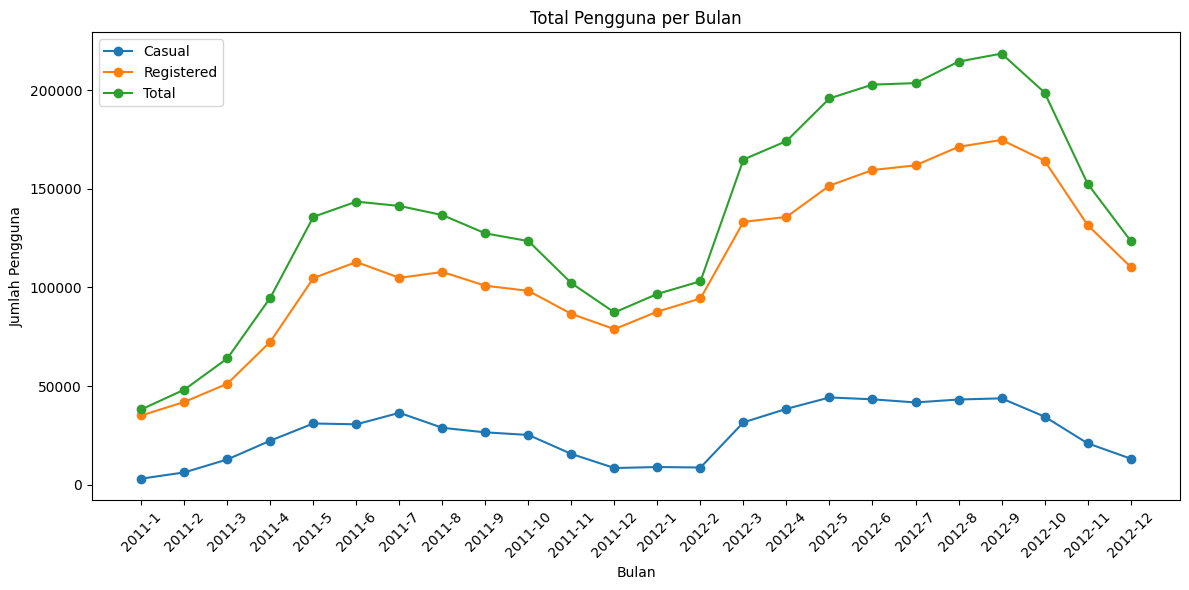

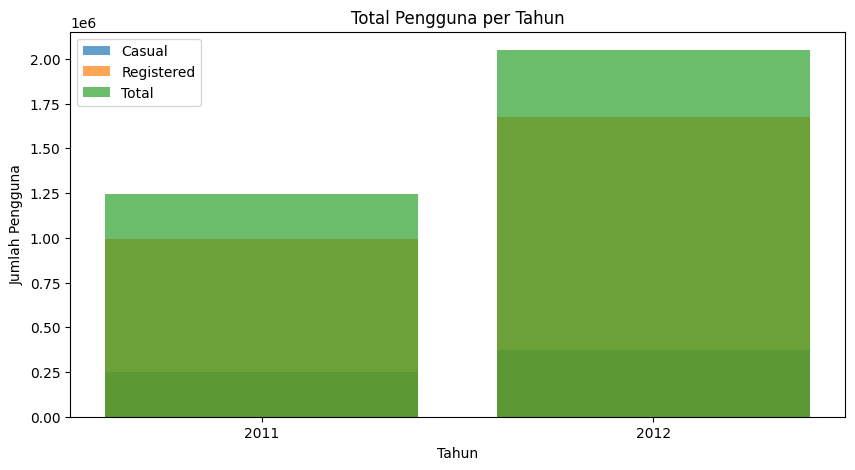

In [24]:
df_hours['date'] = pd.to_datetime(df_hours['date'])

df_hours['month'] = df_hours['date'].dt.month
df_hours['year'] = df_hours['date'].dt.year

total_per_month = df_hours.groupby(['year', 'month'])[['casual', 'registered', 'count']].sum().reset_index()

total_per_year = df_hours.groupby('year')[['casual', 'registered', 'count']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(total_per_month['year'].astype(str) + '-' + total_per_month['month'].astype(str), total_per_month['casual'], label='Casual', marker='o')
plt.plot(total_per_month['year'].astype(str) + '-' + total_per_month['month'].astype(str), total_per_month['registered'], label='Registered', marker='o')
plt.plot(total_per_month['year'].astype(str) + '-' + total_per_month['month'].astype(str), total_per_month['count'], label='Total', marker='o')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.title('Total Pengguna per Bulan')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(total_per_year['year'].astype(str), total_per_year['casual'], label='Casual', alpha=0.7)
plt.bar(total_per_year['year'].astype(str), total_per_year['registered'], label='Registered', alpha=0.7)
plt.bar(total_per_year['year'].astype(str), total_per_year['count'], label='Total', alpha=0.7)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengguna')
plt.title('Total Pengguna per Tahun')
plt.legend()
plt.show()


Gambar grafik garis menunjukkan tren peningkatan total pengguna sepeda per bulan dari November 2011 hingga Oktober 2012. Terdapat fluktuasi bulanan dengan penurunan pada Januari, Juli, dan September 2012. Peningkatan tertinggi terjadi pada bulan Maret dan April 2012. Analisis membedah tren untuk pengguna casual dan registered, menyoroti peningkatan keseluruhan dengan fluktuasi serupa. Meskipun data mencakup periode Januari 2011 hingga Oktober 2012, catatan bahwa gambar tidak mencakup November dan Desember 2011.

### Pertanyaan 2: Apakah ada pola musiman dalam penggunaan sepeda, dan bagaimana hal itu berhubungan dengan musim?

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


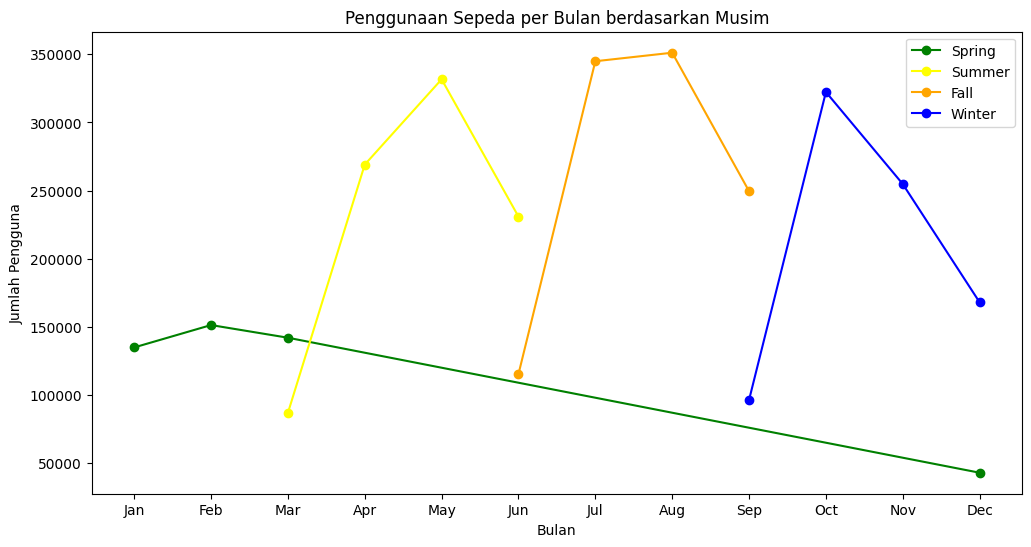

In [25]:
file_path = 'hour.csv'
df_hours = pd.read_csv("/content/hour.csv")

print(df_hours.columns)
df_hours['dteday'] = pd.to_datetime(df_hours['dteday'])

df_hours['month'] = df_hours['dteday'].dt.month
df_hours['season_name'] = df_hours['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

total_per_month = df_hours.groupby(['month', 'season_name'])[['cnt']].sum().reset_index()

colors = {'Spring': 'green', 'Summer': 'yellow', 'Fall': 'orange', 'Winter': 'blue'}

plt.figure(figsize=(12, 6))
for season in total_per_month['season_name'].unique():
    season_data = total_per_month[total_per_month['season_name'] == season]
    plt.plot(season_data['month'], season_data['cnt'], label=season, marker='o', color=colors[season])

plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.title('Penggunaan Sepeda per Bulan berdasarkan Musim')
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Berdasarkan gambar yang diatas, terlihat adanya pola musiman dalam penggunaan sepeda. Jumlah pengguna sepeda cenderung lebih tinggi di musim semi dan musim panas, yang dapat dijelaskan oleh cuaca yang lebih hangat dan cerah pada periode tersebut. Sebaliknya, penggunaan sepeda menurun di musim gugur dan musim dingin, mungkin karena cuaca yang lebih dingin, basah, dan bersalju.

## Conclusion

- Conclution pertanyaan 1
Berdasarkan analisis data jumlah pengguna sepeda dari Januari 2011 hingga Oktober 2012, dapat disimpulkan bahwa terdapat tren positif peningkatan jumlah pengguna sepeda secara keseluruhan. Meskipun terdapat fluktuasi bulanan, peningkatan signifikan terjadi pada bulan Maret dan April 2012. Baik pengguna casual maupun registered menunjukkan tren peningkatan yang serupa, meskipun fluktuasi bulanan yang sebanding.

Perlu dicatat bahwa gambar grafik tidak mencakup data untuk November dan Desember 2011, dan analisis ini terbatas pada periode Januari 2011 hingga Oktober 2012. Oleh karena itu, kesimpulan ini mungkin tidak mencerminkan tren jangka panjang. Saran untuk analisis lebih lanjut mencakup pemahaman lebih mendalam berdasarkan faktor demografis dan perbandingan data dengan periode waktu lain untuk memahami evolusi tren penggunaan sepeda. Meskipun demikian, analisis ini memberikan gambaran positif tentang pertumbuhan pengguna sepeda selama periode yang dianalisis.
- Conclution pertanyaan 2:

Berdasarkan gambar yang diatas, dapat disimpulkan bahwa terdapat pola musiman dalam penggunaan sepeda. Jumlah pengguna sepeda cenderung lebih tinggi di musim semi dan musim panas, yang mungkin dipengaruhi oleh cuaca yang lebih hangat dan cerah. Sebaliknya, terjadi penurunan penggunaan sepeda di musim gugur dan musim dingin, yang bisa dikaitkan dengan cuaca yang lebih dingin, basah, dan bersalju.

Kesimpulan ini didukung oleh pemahaman bahwa preferensi bersepeda dipengaruhi oleh faktor cuaca. Namun, perlu diingat bahwa data yang dianalisis hanya mencakup satu tahun, sehingga analisis ini terbatas pada periode tersebut dan mungkin tidak mencerminkan tren jangka panjang. Faktor lain, seperti infrastruktur bersepeda, harga bahan bakar, dan kebijakan pemerintah, dapat juga memengaruhi pola musiman penggunaan sepeda.

Saran untuk analisis lebih lanjut mencakup pemahaman karakteristik pengguna, perbandingan data dengan periode lain, serta penggunaan visualisasi dan perhitungan statistik. Referensi sumber dapat memberikan tambahan informasi untuk mendukung pemahaman tentang pola musiman dalam penggunaan sepeda. Kesimpulan ini diharapkan dapat memberikan wawasan terhadap faktor-faktor yang memengaruhi dinamika penggunaan sepeda selama perubahan musim.